In [2]:
# Single Linear Regression manually without using libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Data
df = pd.read_csv('/content/housing_LR.csv', usecols=['size', 'price'])
df

,size,price
0,57.0,52000.0
1,52.0,56000.0
2,42.0,37000.0
3,65.0,49500.0
4,70.0,55000.0
...,...,...
7273,38.0,24500.0
7274,49.0,32000.0
7275,64.0,40000.0
7276,18.0,11000.0


In [62]:
# Split train and test data
np.random.seed(42)
test_df = df.sample(1500)
x_test = test_df['size']
y_test = test_df['price']
x_train = df['size'].drop(test_df.index, axis=0)
y_train = df['price'].drop(test_df.index, axis=0)
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((1500,), (1500,), (5778,), (5778,))

In [244]:
# Compute Gradient
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_w = 0
    dj_b = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_w += (f_wb - y[i]) * x[i]  # Corrected the calculation of dj_w
        dj_b += (f_wb - y[i])          # Corrected the calculation of dj_b
    dj_w /= m
    dj_b /= m

    return dj_w, dj_b

# Compute cost
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2
    return 1 / (2 * m) * cost

# Gradient Descent
def gradient_descent(x, y, w_in, b_in, alpha, iterations):
    b = b_in
    w = w_in
    for _ in range(iterations):
        dj_w, dj_b = compute_gradient(x, y, w, b)

        b = b - alpha * dj_b  # Corrected the update for b
        w = w - alpha * dj_w  # Corrected the update for w

        # Print the cost every few iterations
        if _ % 1000 == 0:
            cost = compute_cost(x, y, w, b)
            print("Iteration:", _, " Cost:", cost)

    return w, b

In [117]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [118]:
LR.coef_, LR.intercept_

(array([[798.2761093]]), array([-2086.67345062]))

In [119]:
LR.predict(x_test.reshape(-1,1))

array([[39423.68423295],
       [76144.38526072],
       [31440.92313995],
       ...,
       [53792.65420033],
       [56985.75863753],
       [31440.92313995]])

In [187]:
x_train = np.array(df['size'].drop(test_df.index, axis=0).values)
#x_train = np.array([x/x_train.max() for x in y_train])
y_train = np.array(df['price'].drop(test_df.index, axis=0).values)
#y_train = np.array([x/y_train.max() for x in y_train])

In [253]:
w_init = 0
b_init = 0
alpha = 0.0001
w, b = gradient_descent(x_train, y_train, w_init, b_init, alpha, 8000)
print(f"(w,b) found by gradient descent: ({w},{b}")

Iteration: 0  Cost: 465009339.6220959
Iteration: 1000  Cost: 160552711.18836555
Iteration: 2000  Cost: 160543369.3558163
Iteration: 3000  Cost: 160534301.99886146
Iteration: 4000  Cost: 160525501.0530402
Iteration: 5000  Cost: 160516958.69083676
Iteration: 6000  Cost: 160508667.31471437
Iteration: 7000  Cost: 160500619.5503661
(w,b) found by gradient descent: (775.7664848276777,-226.3386578181457


In [257]:
def predict(test):
  m = test.shape[0]
  f_wb = []
  for i in range(m):
    f_wb.append(w * test[i] + b)
  return np.array(f_wb)
y_predicted = predict(x_test)
pd.DataFrame({"Actual data: ": y_test, "Predicted: ":y_predicted})

,Actual data:,Predicted:
0,39000.0,40113.518553
1,66000.0,75798.776855
2,25000.0,32355.853705
3,102000.0,46319.650432
4,30500.0,29252.787766
...,...,...
1495,37000.0,32355.853705
1496,120000.0,61834.980128
1497,85000.0,54077.315280
1498,93000.0,57180.381219


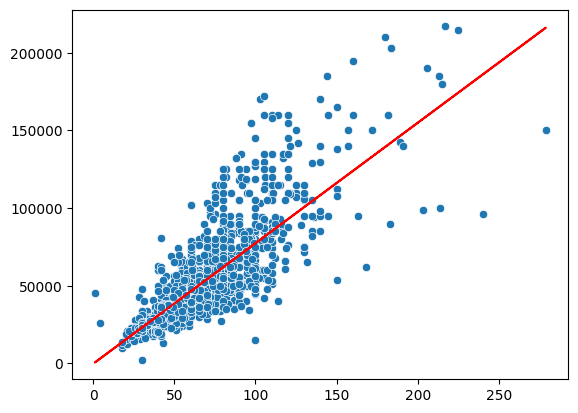

In [255]:
import seaborn as sns
sns.scatterplot(x=x_test, y=y_test)
plt.plot(x_test, y_predicted, color='red', label='Regression Line')
plt.show()

In [258]:
# Calculate MAE
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
mae(y_test, y_predicted)

12548.516579965164